In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [222]:
train = pd.read_csv('titanic_train.csv')

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

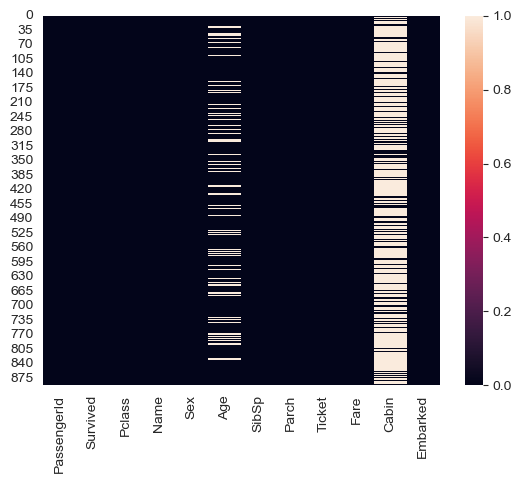

In [225]:
sns.heatmap(train.isnull())

<Axes: >

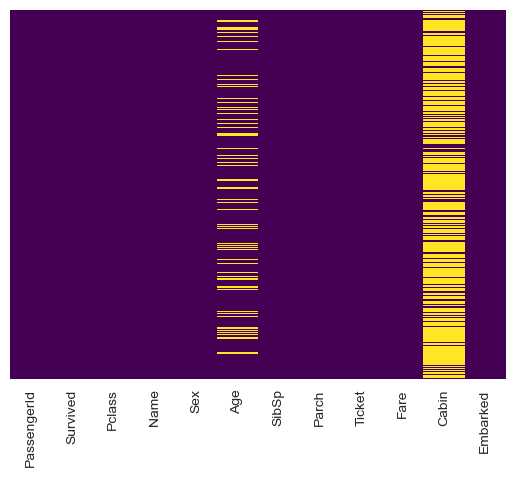

In [226]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False,cmap= 'viridis')

In [227]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

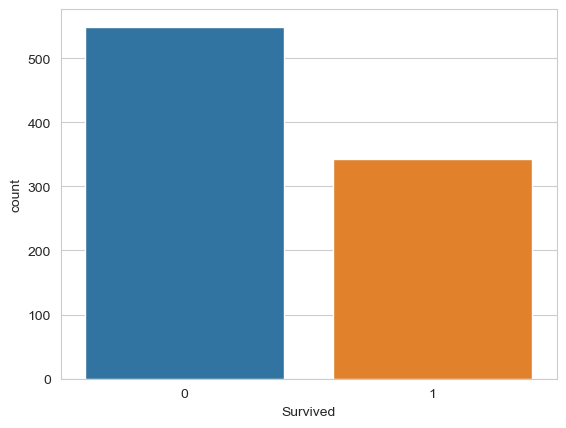

In [228]:
sns.countplot(x= 'Survived', data = train)

<Axes: xlabel='Sex', ylabel='count'>

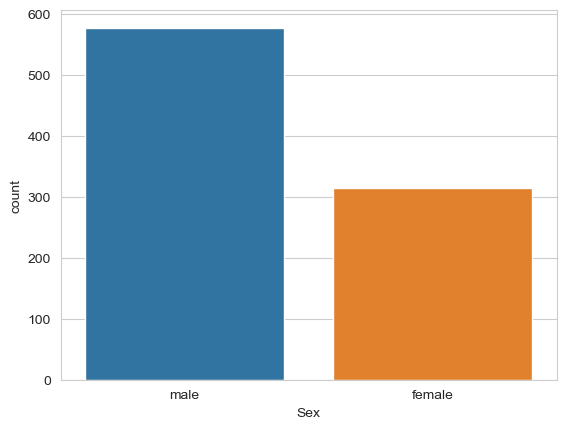

In [229]:
sns.countplot(x= 'Sex', data = train)

<Axes: xlabel='SibSp', ylabel='count'>

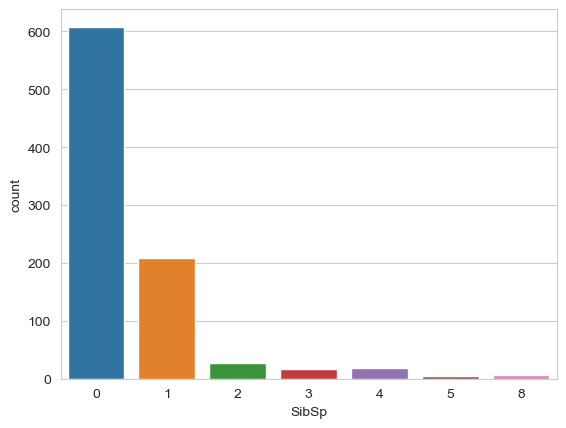

In [230]:
sns.countplot(x= 'SibSp', data = train)

<Axes: xlabel='Survived', ylabel='count'>

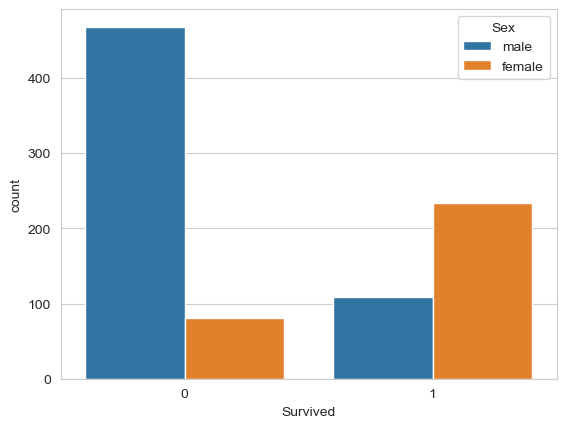

In [231]:
sns.countplot(x= 'Survived',hue='Sex', data = train)

<Axes: xlabel='Survived', ylabel='count'>

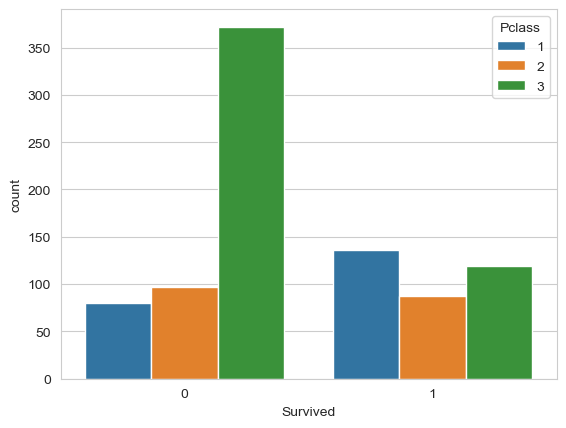

In [232]:
sns.countplot(x= 'Survived',hue='Pclass', data = train)

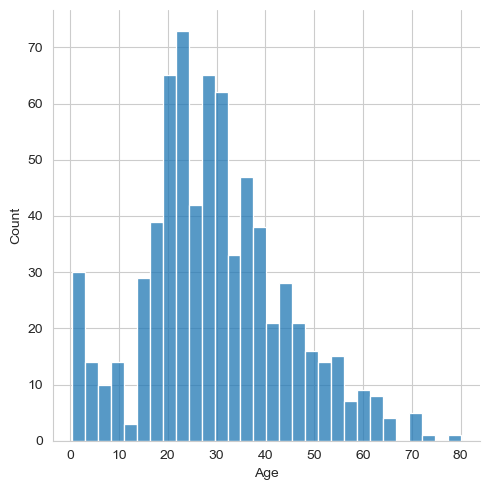

In [233]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

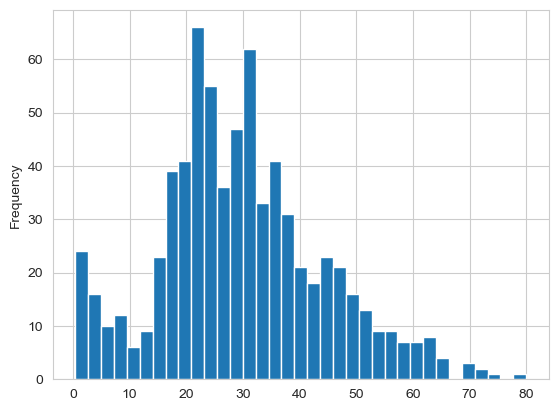

In [234]:
train['Age'].plot.hist(bins=35)

In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

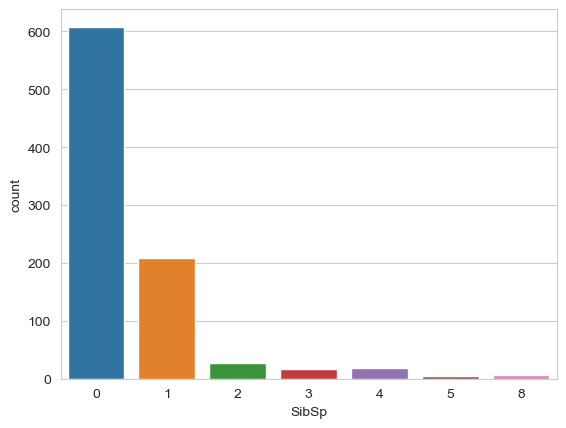

In [236]:
sns.countplot(x= 'SibSp', data=train )

<Axes: >

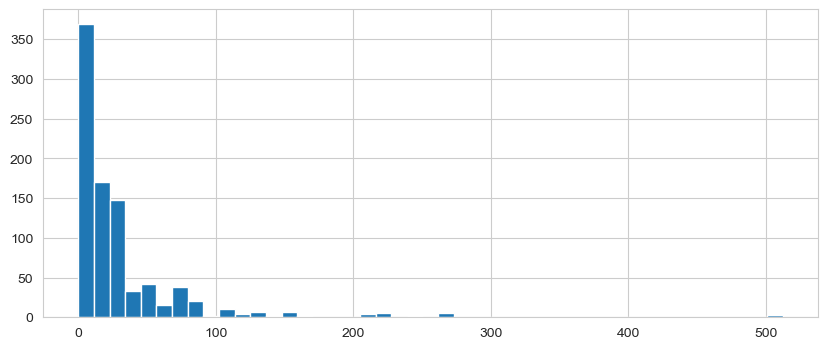

In [237]:
train['Fare'].hist(bins=45, figsize=(10,4))

In [238]:
import cufflinks as cf

In [239]:
cf.go_offline()

In [240]:
train['Fare'].iplot(kind='hist', bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

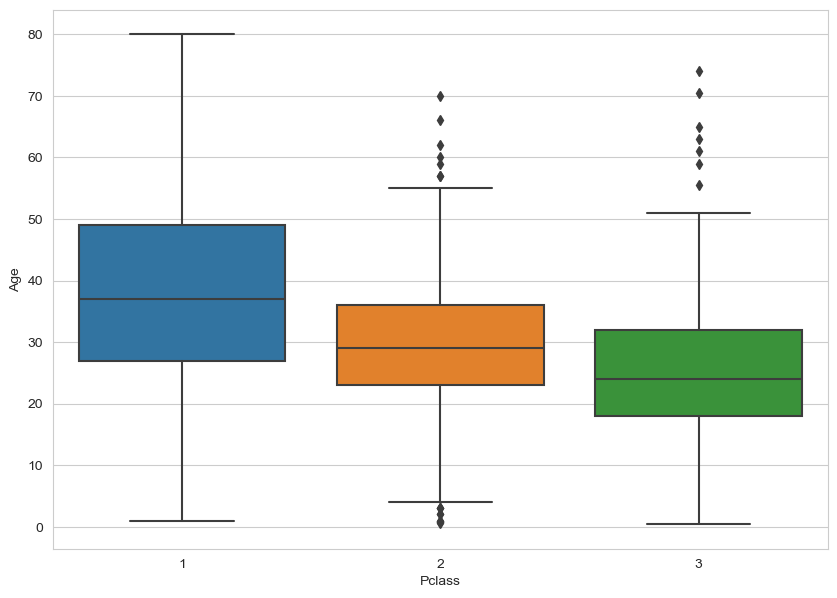

In [241]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train )

In [242]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [243]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis =1)

<Axes: >

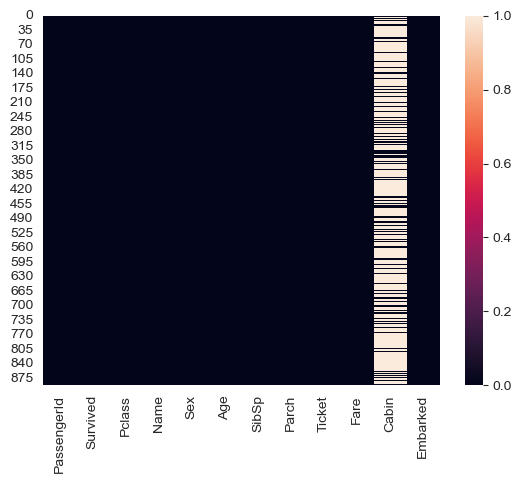

In [244]:
sns.heatmap(train.isnull())

<Axes: >

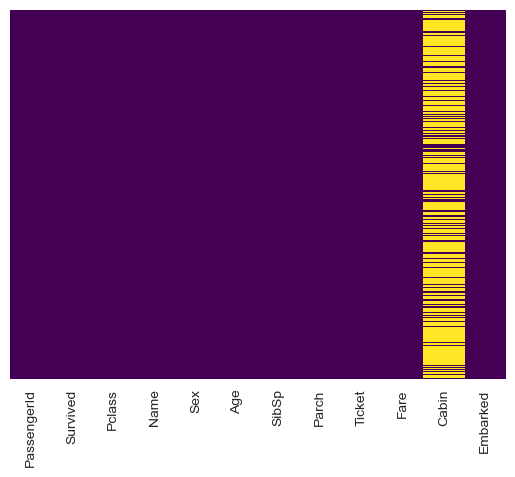

In [245]:
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap= 'viridis')

In [246]:
train.drop('Cabin', axis=1, inplace= True)

In [247]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [248]:
train.dropna(inplace=True)

In [249]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [250]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [251]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [252]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [253]:
pd.get_dummies(train['Embarked'], drop_first= True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [254]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [255]:
train = pd.concat([train,sex,embark], axis=1)

In [256]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [287]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace = True)

In [288]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [289]:
train_drop.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [290]:
train_drop.drop('PassengerId', axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [291]:
train_drop.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [294]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [295]:
from sklearn.model_selection import train_test_split


In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [297]:
from sklearn.linear_model import LogisticRegression

In [298]:
logmodel = LogisticRegression()

In [299]:
logmodel.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [300]:
predications = logmodel.predict(X_test)

In [301]:
predications

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [303]:
from sklearn.metrics import classification_report


In [304]:
print(classification_report(y_test, predications))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       174
           1       0.81      0.65      0.72       120

    accuracy                           0.80       294
   macro avg       0.80      0.77      0.78       294
weighted avg       0.80      0.80      0.79       294



In [305]:
from sklearn.metrics import confusion_matrix

In [306]:
confusion_matrix(y_test, predications)

array([[156,  18],
       [ 42,  78]], dtype=int64)